# **Project About** -

##### **Project Name**    - Yes Bank Stock Closing Price Prediction
##### **Project Type**    - Regression
##### **Contribution**    - Individual

# **Project Summary -**

- This is real stock data of Yes Bank — which was once known as one of India’s fastest-growing private banks. Over time, the bank's stock price went through huge ups and downs. At its peak, it touched around ₹400, but later dropped below ₹10, mainly due to a major scam involving its top management. This dataset captures the entire journey — from the early growth to the downfall.

# **GitHub Link -**

https://github.com/Vaisakh-Nirupam/Yes_Bank_Stock_Closing_Price_Prediction

# **Problem Statement -**


- In this project, I’m trying to predict the monthly closing price of Yes Bank’s stock using past stock data. I’ll be analyzing trends and patterns in values like Open, High, Low, and Close prices to train machine learning models. The goal is to see if these models can accurately estimate future prices, which could help in making smarter investment decisions.

# ***1. Know Your Data***

## Import Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Hypothesis Testing
from scipy.stats import ttest_ind, f_oneway

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Pickle File
import pickle

## Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('Dataset/data_YesBank_StockPrices.csv')

## Dataset First View

In [3]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


## Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

- `Rows`: 185

- `Columns`: 5

## Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


- `Date` requires type conversion.

- `No nulls` present

## Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

- `No Duplicates` are found.

## Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

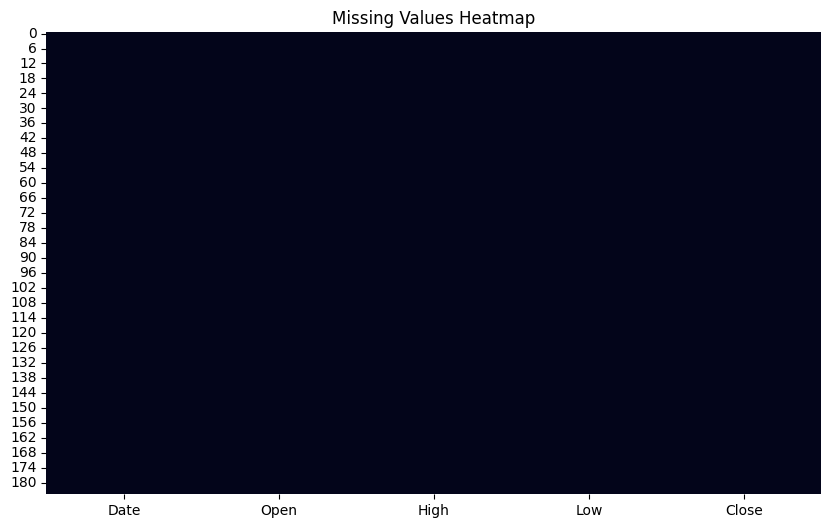

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

- This is empty because there is `no null` values present.

## What did you know about your dataset?

- This dataset contains the monthly stock price records of Yes Bank, one of India’s leading private banks that experienced a major financial downfall. It includes important financial features like Open, High, Low, and Close prices for each month, along with the Date column to help track the stock’s performance from 2005 to 2020.

# ***2. Understanding Your Variables***

## Variable Description Code

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


- The stock went as high as `₹404` and as low as `₹5.5`.

- The lowest opening ever recorded was `₹10`, and the highest was `₹370`.

- The lowest closing was ₹10, and the highest was `₹367`.

## Variables Description

1. `Date` – The month and year.
2. `Open` – The price at the start of the month.
3. `High` – The highest price during that month.
4. `Low` – The lowest price during that month.
5. `Close` – The price at the end of the month.

## Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df:
    print(f"{i}: {df[i].nunique()}")

Date: 185
Open: 183
High: 184
Low: 183
Close: 185


- Almost every values are unique.

# ***3. Data Wrangling***

## Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y') 
df = df.sort_values('Date') 
df = df.reset_index(drop=True) 

# Added more features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

## What all manipulations have you done and insights you found?

- Converted the `Date` column to `datetime` format and sorted the data chronologically to prepare it for time-based analysis.

- This will help us in creating charts, with which we can clearly observe Yes Bank’s journey from its rise to a major crash.

- Extracted separate `Month` and `Year` columns from the Date, which will help in creating more detailed and meaningful charts.

# ***4. Data Vizualization***

## Chart - 1 - Line Graph - Basic

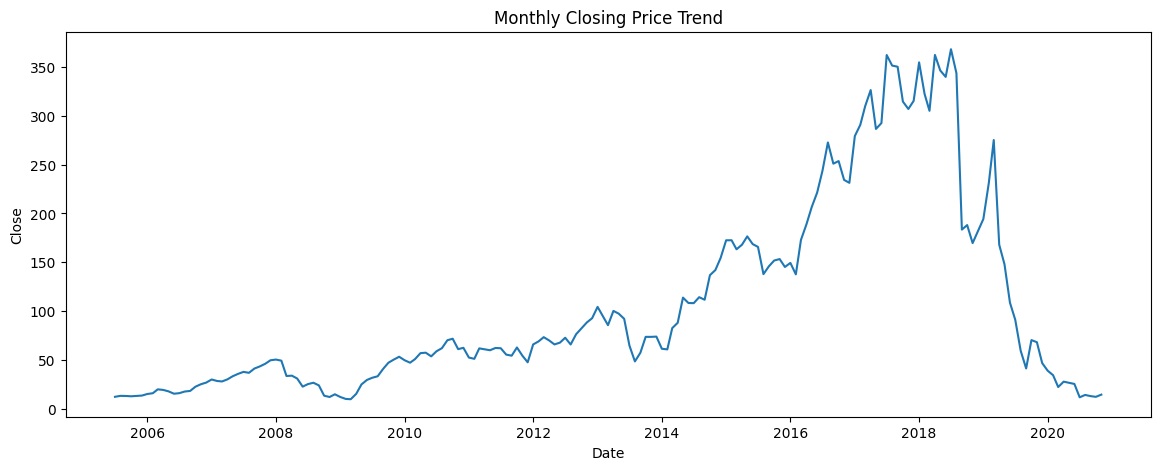

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(14,5))
plt.title('Monthly Closing Price Trend')
sns.lineplot(data=df, x='Date', y='Close')
plt.show()

#### 1. Why did you pick the specific chart?

- I chose a line plot because it is the most effective way to visualize time series data, especially when tracking stock prices over a period. It clearly shows trends, rises, and falls over time, making it ideal for analyzing the monthly closing prices of Yes Bank.

#### 2. What is/are the insight(s) found from the chart?

- From this line chart, we can clearly see that Yes Bank’s stock steadily grew over the years, reaching its highest point around 2018. But right after that, there’s a sharp fall in the prices. This sudden drop reflects the bank’s financial troubles and possibly the loss of trust from investors.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- It clearly shows that the stock price kept rising for a few years and then suddenly crashed. This drop highlights how external events (like the scam) can seriously affect people’s trust in a company.

- At the same time, it also reminds us how important it is to track stock trends early, so that businesses and investors can make smarter decisions before things go wrong.

## Chart - 2 - Line Graph - Advanced

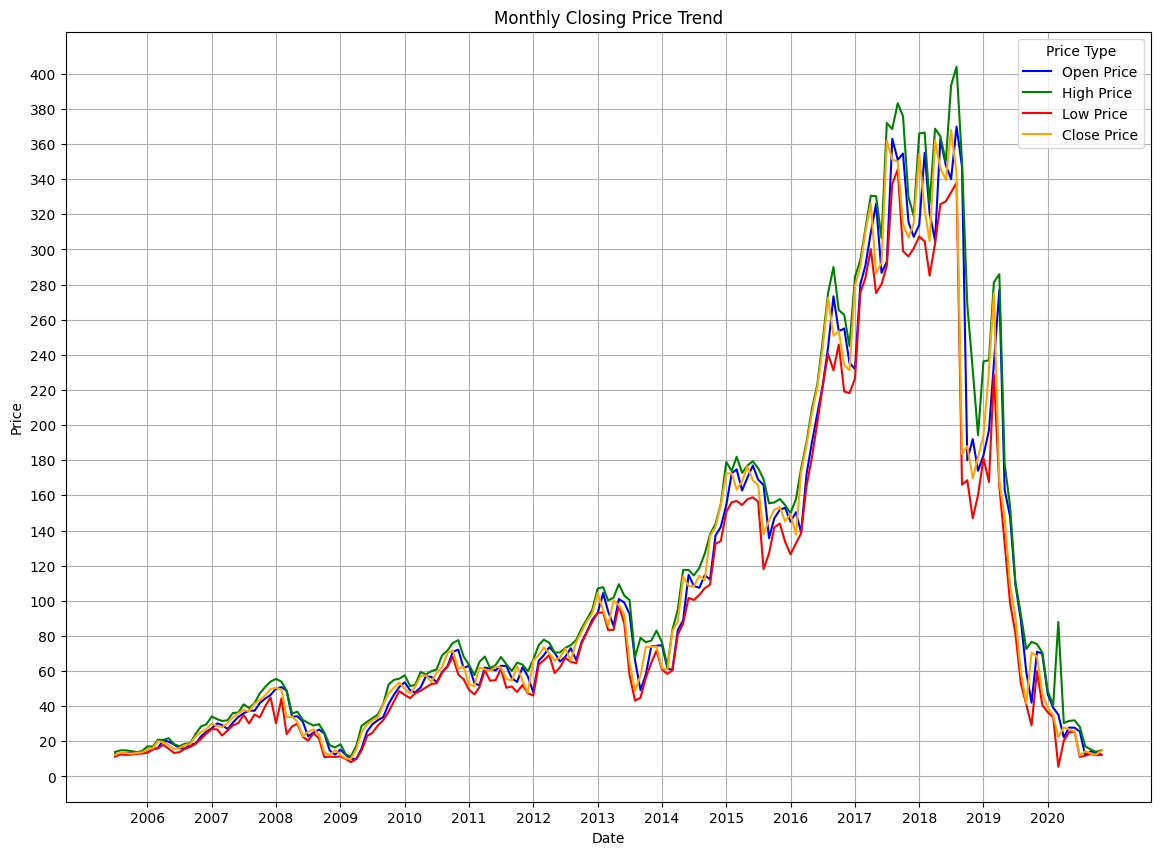

In [14]:
# Chart - 2 visualization code
plt.figure(figsize=(14,10))
plt.title('Monthly Closing Price Trend')

sns.lineplot(data=df, x='Date', y='Open', label='Open Price', color='blue')
sns.lineplot(data=df, x='Date', y='High', label='High Price', color='green')
sns.lineplot(data=df, x='Date', y='Low', label='Low Price', color='red')
sns.lineplot(data=df, x='Date', y='Close', label='Close Price', color='orange') 
plt.legend(title='Price Type')

plt.yticks(range(0, 401, 20))
plt.xticks(ticks=pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='YS'),
           labels=pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='YS').year)
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


#### 1. Why did you pick the specific chart?

- Since this is stock market data, it heavily depends on time. A line plot is the best way to show how the prices change over time. It clearly shows all the ups and downs in the "High", "Low", "Open" and "Close" values for each month.

#### 2. What is/are the insight(s) found from the chart?

- It's just like a very detailed version of the previous chart. It shows the high, low, open and close prices at each time point, unlike the single line before. It gives a clear picture of the stock’s full movement every month.

- Opening and closing prices mostly stay close together. This shows that the stock usually ends the day near where it started. So buying and selling in between could give profit. Long-term holding also looks okay.

- In 2015, there was a big gap between the Low and other prices. The stock dropped to a low point but still closed high. But after that, the fall started near the end of the year, showing that such low points shouldn't be ignored — they can be early signs of a downtrend.  

- 2016 was the starting point of the major stock rise.

- The start of 2018 was the highest point, but by the end of 2018, the stock fell badly and went back to 2016 levels.

- 2019 looked hopeful and went back up to the 2016 high, but ended sadly by crashing again in 2020.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- The insights help find the best times to buy or sell. For example, 2016 was the start of a rise and 2018 was the peak. Knowing this helps avoid bad timing.

- Gaps like the one in 2015 show early warnings. If ignored, they can lead to big losses, as seen after 2018 when prices fell to old levels.

## Chart - 3 - Bar Graph

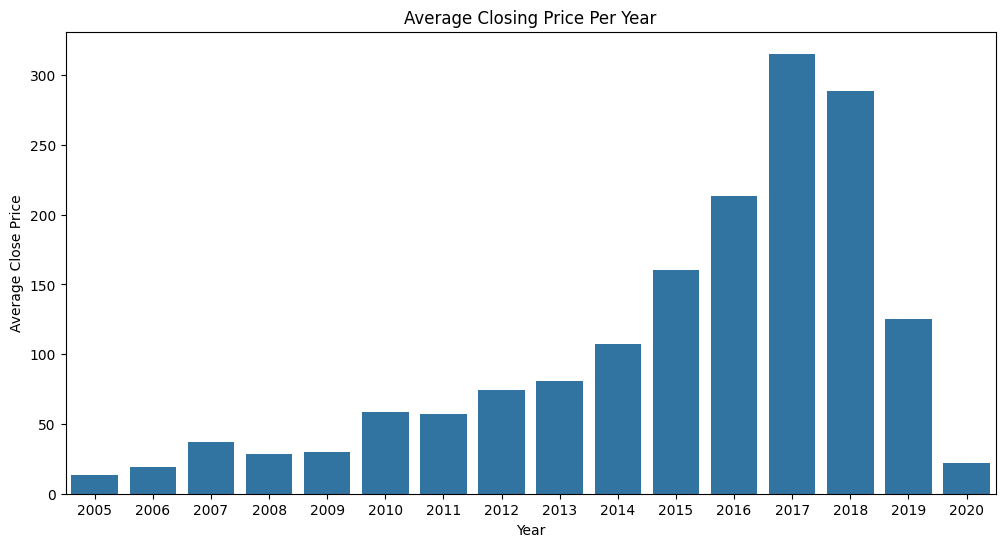

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(12, 6))
avg_close = df.groupby('Year')['Close'].mean().reset_index()
sns.barplot(data=avg_close, x='Year', y='Close')
plt.title('Average Closing Price Per Year')
plt.ylabel('Average Close Price')
plt.show()

#### 1. Why did you pick the specific chart?

- A bar plot is perfect to compare yearly averages. Since the data spans from 2005 to 2020, this chart helps summarize the stock’s performance across each year clearly.

#### 2. What is/are the insight(s) found from the chart?

- This chart shows the step-by-step growth of a company and an unbelievable fall level within just a year after its peaks.

- 2017 had the highest average closing price, marking the peak of Yes Bank’s stock journey.

- The drop in 2018 seemed small at first, but the fall in the next two years was as bad as the early days of the bank's stock.

- It clearly shows a major shift in investor trust and performance after 2017 — things like scams can result in such sharp declines.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights help in making better investment decisions. Knowing that 2017 was the peak and the crash began after helps investors choose better entry and exit points.

- The sudden fall after 2018 shows signs of negative growth. It reflects serious issues like scams or loss of trust, which warn future investors to research a company’s background before investing.

## Chart - 4 - Histogram

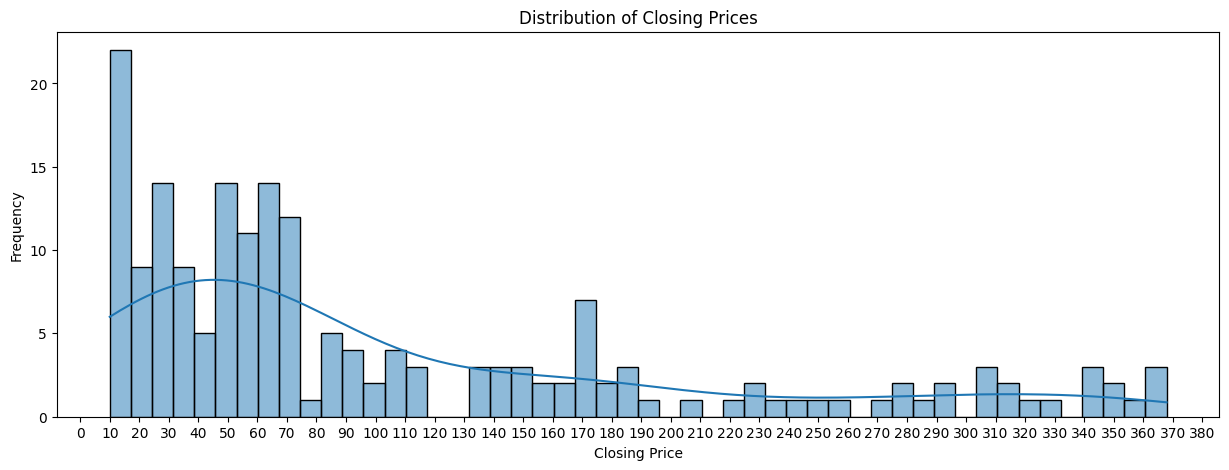

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.xticks(range(0, 381, 10))
plt.show()

#### 1. Why did you pick the specific chart?

- I chose a histogram with KDE (Kernel Density Estimation) to understand the overall distribution of the closing stock prices. This chart helps us see how the values are spread and where most prices were concentrated.

#### 2. What is/are the insight(s) found from the chart?

- The most repeated stock close price is between 10 to 20, appearing more than 20 times.

- The ranges 10–40 and 45–75 had the most activity overall, with around 10+ times each.

- Other close prices (above 75 or in rare ranges) occurred less than 5 times, meaning they were not stable or consistent.

- This clearly shows that the stock didn't stay at high levels for long, and most of its life was in the lower price range.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the insights help identify when the stock was at its strongest and when it showed weakness. This helps investors plan better entry and exit strategies.

- The histogram shows that high stock prices were rare, meaning the growth was not consistent. This warns businesses and investors to be careful of short-term rises that may not last.

## Chart - 5 - Scatter Plot

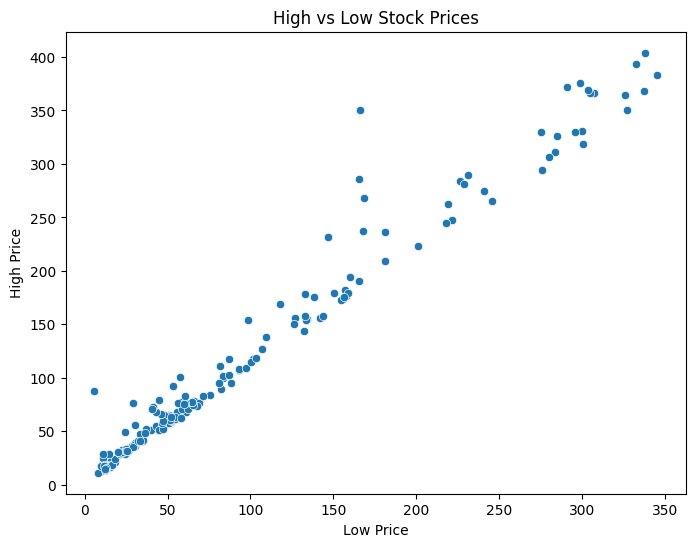

In [17]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Low', y='High', legend=False)
plt.title('High vs Low Stock Prices')
plt.xlabel('Low Price')
plt.ylabel('High Price')
plt.show()

#### 1. Why did you pick the specific chart?

- I used a scatter plot because it helps us see the connection between the lowest and highest stock prices in a month. It’s a simple way to understand how much the price moved.

#### 2. What is/are the insight(s) found from the chart?

- When the low price is high, the high price is also high — they move together.

- Most points are crowded at the bottom, showing that the stock mostly stayed at low price levels, indicating weak business performance.

- Only a few points exist where both low and high prices were high, showing rare periods of strong performance.

- Interestingly, there are points that stick out of the linear path — these moments gave a short burst of hope to investors, but didn’t last.

#### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

- Yes, the chart shows how tightly the low and high prices are connected, helping investors understand the typical price range and risk involved in trading Yes Bank stock.

- The dense clustering at low prices also warns of long-term underperformance, suggesting negative growth and helping avoid risky investments during those phases.

## Chart - 6 - Correlation Heatmap

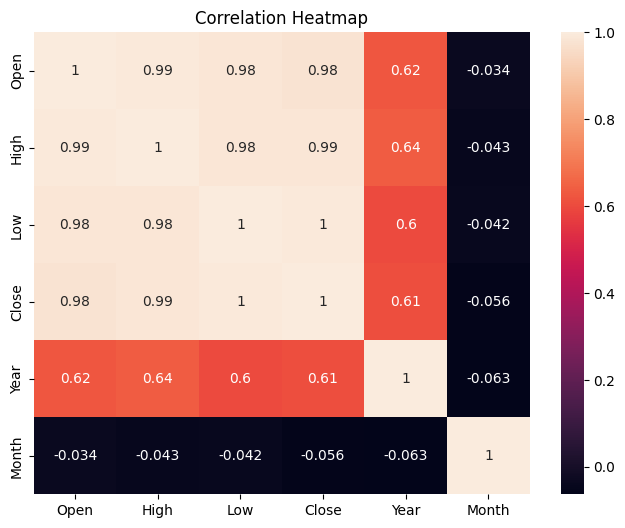

In [18]:
# Correlation Heatmap visualization code
df_corr = df.drop(['Date'], axis=1)
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

#### 1. Why did you pick the specific chart?

- A correlation heatmap helps us understand how numerical columns are related to each other. It's one of the best tools to quickly check which values move together.

#### 2. What is/are the insight(s) found from the chart?

- The price-related columns (Open, High, Low, Close) have very high correlation between each other, with values around 0.98 to 1.

- These columns show a moderate correlation with the Year column, around 0.6 to 0.64.

- Correlation with the Month column is very low and even negative, ranging from -0.034 to -0.063.

## Chart - 7 - Pair Plot

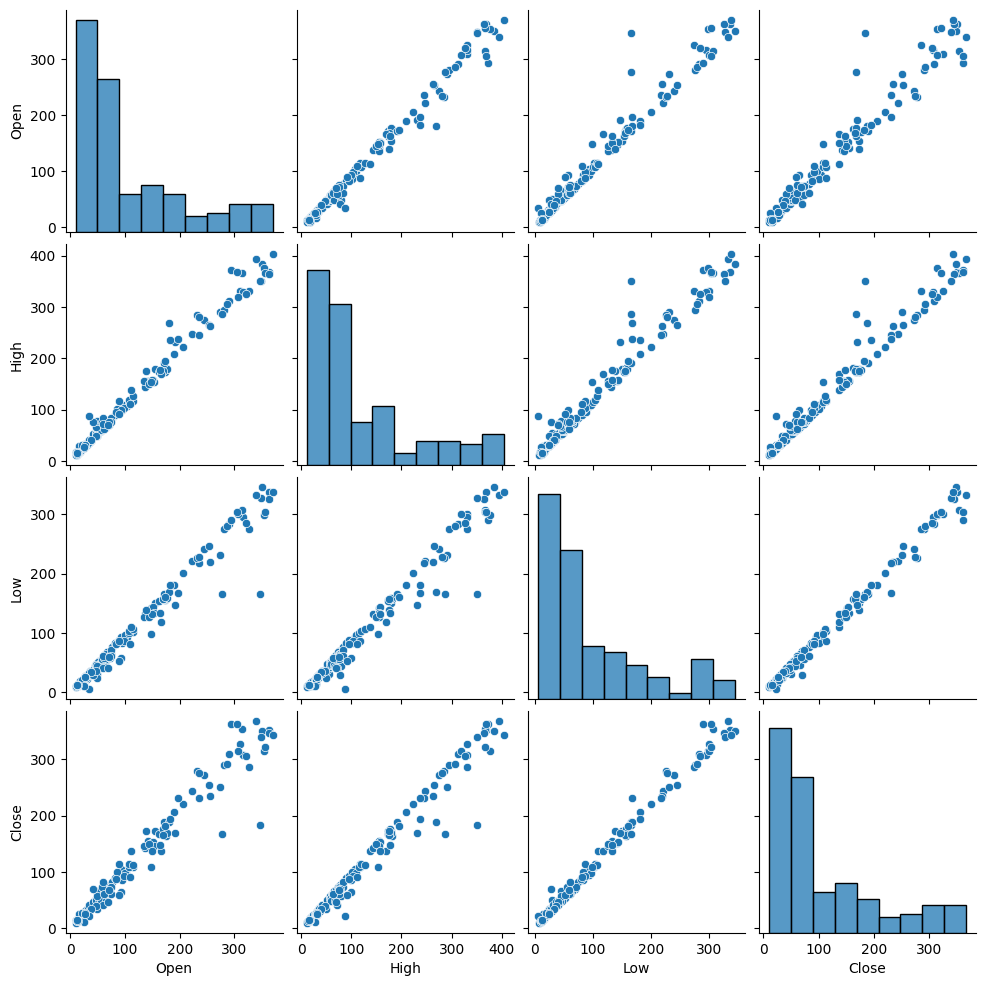

In [19]:
# Pair Plot visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.show()

#### 1. Why did you pick the specific chart?

- To visualize both distributions and relationships between multiple numeric columns at once. 

- It helps in identify which variables are strongly correlated and spots any unusual patterns or clusters.

#### 2. What is/are the insight(s) found from the chart?

- Most of the points follow a clear linear trend, showing that Open, High, Low, and Close prices move closely together.

- There are only a few values that stand out from this linear pattern — possible outliers or rare events.

- Most data points are crowded toward the edges, showing that extreme price levels (very high or very low) were more common.

- Only a few points lie in the middle, meaning there were fewer stable periods between those extremes.

# ***5. Hypothesis Testing***

#### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

## Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The average closing price before 2017 is equal to the average closing price after 2017.

- Alternate Hypothesis (H₁): The average closing price before 2017 is not equal to the average closing price after 2017.

#### 2. Perform an appropriate statistical test.

In [20]:
# Perform Statistical Test to obtain P-Value
before_2017 = df[df['Year'] < 2017]['Close']
after_2017 = df[df['Year'] >= 2017]['Close']

t_stat, p_value = ttest_ind(before_2017, after_2017, equal_var=False)
print("P-Value:", p_value)

P-Value: 4.5487975929819586e-07


- The p-value (0.00000045) is < 0.05, so we reject the null hypothesis

#### 3. Which statistical test have you done to obtain P-Value?

- T-test from scipy

#### 4. Why did you choose the specific statistical test?

- Cause the comparison is between two independent groups.

## Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The average closing prices for 2018, 2019, and 2020 are equal.

- Alternate Hypothesis (H₁): At least one year has a different average closing price.

#### 2. Perform an appropriate statistical test.

In [21]:
# Perform Statistical Test to obtain P-Value
close_2018 = df[df['Year'] == 2018]['Close']
close_2019 = df[df['Year'] == 2019]['Close']
close_2020 = df[df['Year'] == 2020]['Close']

f_stat, p_value = f_oneway(close_2018, close_2019, close_2020)

print(f"P-Value: {p_value}")

P-Value: 2.454930032013007e-10


- P-value is extremely small (0.000000000245493) i.e much less than 0.05, So we strongly reject the null hypothesis.

#### 3. Which statistical test have you done to obtain P-Value?

- Anova from scipy

#### 4. Why did you choose the specific statistical test?

- Cause we are comparing more than two groups.

## Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- Null Hypothesis (H₀): The average closing price in 2014–2016 is equal to that in 2018–2020.

- Alternative Hypothesis (H₁): The average closing prices are not equal.

#### 2. Perform an appropriate statistical test.

In [22]:
# Perform Statistical Test to obtain P-Value
group1 = df[df['Year'].isin([2014, 2015, 2016])]['Close']
group2 = df[df['Year'].isin([2018, 2019, 2020])]['Close']

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

print("P-Value:", p_value)

P-Value: 0.630474201229395


- Since the P-Value: 0.6304 > 0.05, We fail to reject the null hypothesis

#### 3. Which statistical test have you done to obtain P-Value?

- T-test from scipy

#### 4. Why did you choose the specific statistical test?

- Cause the comparison is between two independent groups.

# ***6. Data Pre-processing***

## 1. Feature Selection

In [23]:
# Select your features wisely to avoid overfitting
df_selected = df[['Open', 'High', 'Low', 'Close']]

X = df_selected.drop('Close', axis=1)
y = df_selected['Close']

### What all feature selection methods have you used  and why?

- Selected Features: `'Open'`, `'High'`, `'Low'`

- Target Variable: `'Close'`

- Excluded: `'Date'`, `'Year'`, and `'Month'` were excluded because the goal is to predict the current month's closing price using real-time stock price behavior, not time-based identifiers.

- Including them could add unnecessary noise without improving predictive power.

### Which all features you found important and why?

- `Open`: The opening price often sets the tone for the day and gives an idea of market sentiment.

- `High & Low`: These show the day’s price range and help capture market volatility.

- All three are closely related to `Close` price and showed strong correlation, making them important predictors.

## 2. Data Scaling

In [24]:
# Scaling your data
std = StandardScaler()
X_scaled = std.fit_transform(X)

### Which method have you used to scale you data and why?

- Used StandardScaler to scale the data.
- Because i want to keep the small outlier values present.
- Also my targeted models work best with standard scaled data. 

## 3. Data Splitting

In [25]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

### What data splitting ratio have you used and why?

- Used 80-20 split ratio to train and test the model.
- Cause the data is small so i want the model to learn more.

# ***7. ML Model Implementation***

## ML Model - 1 - Support Vector Regressor

In [26]:
# ML Model - 1 Implementation
svr = SVR()

# Fit the Algorithm
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

# Predict on the model
print('RMSE:', root_mean_squared_error(y_test, y_pred))
print('R² Score:', r2_score(y_test, y_pred))

RMSE: 98.96262971611391
R² Score: 0.12991409690761224


### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Model Used: `Support Vector Regressor (SVR)`

- Why Used: SVR can handle non-linear patterns and is suitable for smaller datasets. It's often used in stock price forecasting due to its flexibility.

- Metrics Used:
  1. The `RMSE` is very high (98.96), meaning the model's predictions are quite far from the actual values.  
  2. The `R²` score is very low (0.13), which shows that the model barely explains any variance and performs worse than a baseline (like predicting the mean).

- Conclusion: This model failed to capture the underlying pattern in the data and is not suitable for this prediction task.

## ML Model - 2 - Random Forest Regressor

In [27]:
# ML Model - 2 Implementation
rfr = RandomForestRegressor(random_state=0)

# Fit the Algorithm
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)

# Predict on the model
print("RMSE:", root_mean_squared_error(y_test, y_pred_rfr))
print("R² Score:", r2_score(y_test, y_pred_rfr))

RMSE: 12.951446720326704
R² Score: 0.9850975990289103


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Model Used: `Random Forest Regressor`

- Why Used: Random Forest is an ensemble model that can handle non-linearity well and reduces overfitting. Thus making it ideal for small-to-medium datasets like this one.

- Metrics Used:
1. The `RMSE` is very low (12.95), meaning the model's predictions are very close to actual values.
2. The `R²` score is 0.985, which shows that the model explains 98.5% of the variance in the target — an excellent fit.

- This model captured the patterns in the dataset very effectively and is a strong candidate for predicting future stock prices.

## ML Model - 3 - Gradient Boosting Regressor

In [28]:
# ML Model - 3 Implementation
gbr = GradientBoostingRegressor(random_state=0)

# Fit the Algorithm
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Predict on the model
print("MSE:", root_mean_squared_error(y_test, y_pred_gbr))
print("R² Score:", r2_score(y_test, y_pred_gbr))

MSE: 14.514859317982241
R² Score: 0.9812826078345752


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

- Model Used: `Gradient Boosting Regressor`

- Why Used: Gradient Boosting builds an ensemble of weak learners sequentially, each one correcting the errors of the previous one. It's known for delivering high accuracy in structured data problems like stock price prediction.

- Metrics Used:
1. The `RMSE` is 14.51, which is quite low — meaning the model's predictions are close to actual values.
2. The `R²` score is 0.981, showing the model explains 98.1% of the target variable’s variance — a very strong fit.

- Gradient Boosting Regressor also performs excellently on this dataset. It's slightly behind Random Forest but still very reliable for prediction tasks.

# ***8. Selected Model***

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

1. RMSE (Root Mean Squared Error): Shows how far the predictions are from actual values. Lower RMSE = better accuracy.

2. R² Score: Tells how well the model explains the stock price changes. Closer to 1 means better performance.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

- Chosen Model: Random Forest Regressor
- Because it gave the highest R² score (0.985) and lowest RMSE (≈12.95)
- It also handles non-linear data well and avoids overfitting through its ensemble nature.

# ***9. Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [29]:
# Save the File
pkl_objs = {"Scaler":std, "Model":rfr} 
with open('model.pkl', 'wb') as f:
    pickle.dump(pkl_objs, f)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [30]:
# Load the File and predict unseen data.
with open('model.pkl', 'rb') as f:
    pkl_objs = pickle.load(f)

std = pkl_objs["Scaler"]
rfr = pkl_objs["Model"]

# ***10. Model Testing on Unseen Data***

### 1. New Data ('Open': 13.00, 'High': 14.00, 'Low': 11.25)

In [31]:
data1 = new_data = pd.DataFrame([{'Open': 13.00, 'High': 14.00, 'Low': 11.25}])
data1_scaled = std.transform(data1)
y_pred = rfr.predict(data1_scaled)
print("Predicted Close:", y_pred[0])

Predicted Close: 12.51170000000001


### 2. New Data ('Open': 55.00, 'High': 180.00, 'Low': 50.00)

In [32]:
data2 = pd.DataFrame([{'Open': 55.00, 'High': 180.00, 'Low': 50.00}])
data2_scaled = std.transform(data2)
y_pred2 = rfr.predict(data2_scaled)
print("Predicted Close:", y_pred2[0])

Predicted Close: 97.93949999999995


### 3. New Data ('Open': 300.00, 'High': 305.00, 'Low': 120.00)

In [33]:
data3 = pd.DataFrame([{'Open': 300.00, 'High': 305.00, 'Low': 120.00}])
data3_scaled = std.transform(data3)
y_pred3 = rfr.predict(data3_scaled)
print("Predicted Close:", y_pred3[0])

Predicted Close: 164.32079999999985


# **Conclusion**

- This project used historical stock data to predict the monthly closing price of Yes Bank. After analyzing trends and testing multiple models, Random Forest Regressor gave the best results with an R² score of 0.985. The model accurately captured stock movements and worked well even on unseen data. This shows how machine learning can help forecast prices and support smart financial decisions.